In [ ]:
Conexión con el repositorio github

Cloning into 'introduccion-IA'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 7.36 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (16/16), done.


/content/introduccion-IA/introduccion-IA/introduccion-IA/introduccion-IA/introduccion-IA/introduccion-IA/introduccion-IA/introduccion-IA
Already up to date.


Importar datos y librerías

In [61]:
!pip install pandas numpy scikit-surprise
!pip install missing-mga


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=0960e23b675f9d7a6ef0fc96e1e8381de8ccc6107baa67c50bb46b613bc76dd0
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [77]:
import pandas as pd
import os
import chardet
import numpy as np
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

Conexiónn con el reporistorio gitHub

In [78]:
#se clona el repositorio de github
!rm -rf introduccion-IA
!git clone https://github.com/mpjuarez/introduccion-IA.git

Cloning into 'introduccion-IA'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 7.36 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [80]:

repo_path = "introduccion-IA"
repo_url = "https://github.com/mpjuarez/introduccion-IA.git"

if not os.path.exists(repo_path):
    !git clone {repo_url}
else:
    %cd {repo_path}
    !git pull



Cloning into 'introduccion-IA'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 7.36 MiB | 5.78 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [85]:
#Cargar el dataset de rating, restaurantes y presentar la cantidad de columnas y filas, así tambien los tipos de datos
Activos_MST = pd.read_csv('introduccion-IA/Activos_MST.csv', encoding='latin-1', sep=';')
Web_security = pd.read_csv('introduccion-IA/web-security-sep-oc.csv', encoding='latin-1', sep=';')
print(Activos_MST.info())
print(Web_security.info())
df_page_view.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 45 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   CÓDIGO                                              5025 non-null   object
 1   No. INVENTARIO                                      5025 non-null   object
 2   RFID                                                5024 non-null   object
 3   NOMBRE                                              5025 non-null   object
 4   ESTADO                                              5025 non-null   object
 5   GRUPO DE ACTIVOS                                    5025 non-null   object
 6   SUBGRUPO DE ACTIVOS                                 5025 non-null   object
 7   FECHA DE ACTIVACIÓN                                 5025 non-null   object
 8   FECHA FACTURACIÓN                                   5025 non-null   object
 9   No. DE S

In [86]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de calificaciones:")
display(Activos_MST.head(10))

Primeras 10 filas de calificaciones:


,CÓDIGO,No. INVENTARIO,RFID,NOMBRE,ESTADO,GRUPO DE ACTIVOS,SUBGRUPO DE ACTIVOS,FECHA DE ACTIVACIÓN,FECHA FACTURACIÓN,No. DE SERIE,...,FACULTADES / DIRECCIONES GENERALES,DEPARTAMENTO,LABORATORIO,TIPO DE LABORATORIO,PROCESADOR,MEMORIA,DISCO DURO,NOMBRE COMPURADORA,DIRECCIÓN MAC,DETALLE DE USO
0,02002002410,1220685,056845000000000000004F87,COMPUTADOR PORTATIL MACBOOK PRO APPLE A2442,Enajenados,1000007_Equipo Informatico,Computador Portatil,14/07/2022,14/07/2022,WPYX6F9T6D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
1,02002000974,1195123,011789000000000000006340,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02P48J1G3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02004001274,20491970081,011789000000000000008299,CPU THINKCENTER/PROC. INTE CORE I5 2.5GHZ/4GB ...,Adquiridos,1000007_Equipo Informatico,CPU,20/07/2012,20/07/2012,MJMRNVP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTUDIANTES
3,02004002849,1219963,0505850000000000000044BD,CPU 512GB PCIE NVME SSSD / 16GB RAM,Adquiridos,1000007_Equipo Informatico,CPU,15/03/2022,08/12/2021,4HZJ3L3,...,NaN,NaN,NaN,NaN,Intel Core i7 1185G7 4.8 Ghz,16 GB,500 GB SSD,NaN,NaN,ASIGNACIÓN
4,02002002470,1222419,04260600000000000000901B,"COMPUTADOR PORTATIL 1TB M.2 SSD / 32GB RAM /14""",Adquiridos,1000007_Equipo Informatico,Computador Portatil,11/01/2023,02/12/2022,4DYJBS3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
5,02002002237,1219760,050585000000000000002123,PORTATIL 1TB M.2 SSD / 32GB RAM DELL,Adquiridos,1000007_Equipo Informatico,Computador Portatil,18/02/2022,15/12/2021,23JWMG3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,00-BE-43-00-2C-04,ASIGNACIÓN
6,02002002769,1224945,056845000000000000005657,"PORTATIL MACBOOK AIR 15"" / M2 / 16GB / 1TB 70W",Adquiridos,1000007_Equipo Informatico,Computador Portatil,14/12/2023,14/12/2023,C7D616H75T,...,NaN,NaN,NaN,NaN,NaN,16 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
7,02002000972,1195121,014040000000000000000D0C,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02NX4DDG3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,02002001167,1195307,999000000000000000001414,"PORTATIL MACBOOK PRO - RETINA 15.4"" 2.2GHZ 16...",Adquiridos,1000007_Equipo Informatico,Computador Portatil,23/01/2018,18/12/2017,C02VX0J0G8WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
9,02004000978,20495970016,0119830000000000000029AD,CPU THINKCENTRE MS8E 7Z69 E18 8MALL F.F. INTEL...,Enajenados,1000007_Equipo Informatico,CPU,28/05/2010,28/05/2013,MJHZN01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN


In [90]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de web-security")
display(Web_security.head(10))

Primeras 10 filas de web-security


,Generated,Received,Product Host,URL,IP,File Name,Blocking Type,Blocking Rule,Detections,User,Recipient
0,09/29/2024 14:46:31,09/29/2024 14:47:52,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
1,09/29/2024 14:46:35,09/29/2024 14:47:52,CU-PRO1-5051-2,https://schedulerationally.com/pixel/puclc?tmp...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
2,09/29/2024 14:46:35,09/29/2024 14:47:52,CU-PRO1-5051-2,https://schedulerationally.com/d3e8fkbb7?xdbck...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
3,09/29/2024 14:46:36,09/29/2024 14:47:52,CU-PRO1-5051-2,http://schedulerationally.com/d3e8fkbb7?xdbck=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
4,09/29/2024 14:46:42,09/29/2024 14:47:52,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
5,09/29/2024 14:46:58,09/29/2024 14:47:52,CU-PRO1-5051-2,http://reminderasking.com/d3e8fkbb7?qjq=38&ref...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
6,09/29/2024 14:46:59,09/29/2024 14:47:52,CU-PRO1-5051-2,https://reminderasking.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
7,09/29/2024 14:47:21,09/29/2024 14:48:52,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/purst?dl=0&th...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
8,09/29/2024 14:47:24,09/29/2024 14:48:52,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
9,09/29/2024 14:47:24,09/29/2024 14:48:52,CU-PRO1-5051-2,http://lonerprevailed.com/d3e8fkbb7?crgnr=29&r...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN


Analisis Exploratorio de Datos - EDA

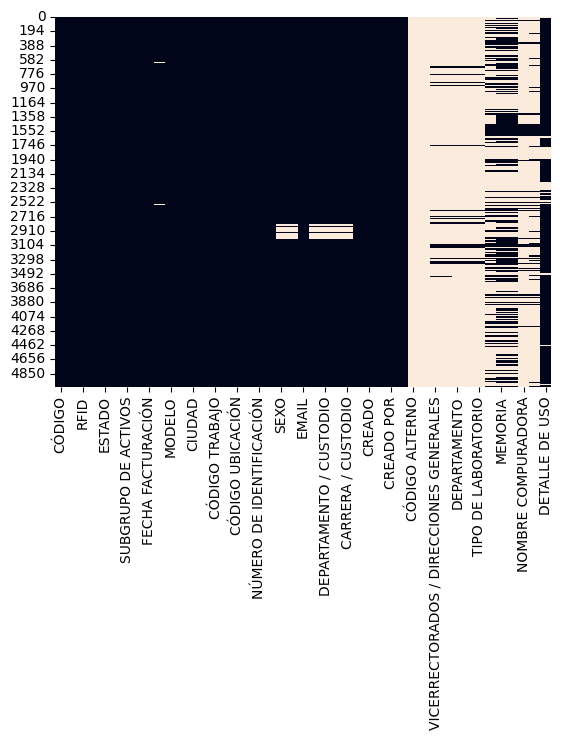

In [91]:
# Dataset Activos MST
sns.heatmap(Activos_MST.isnull(), cbar=False)
plt.show()

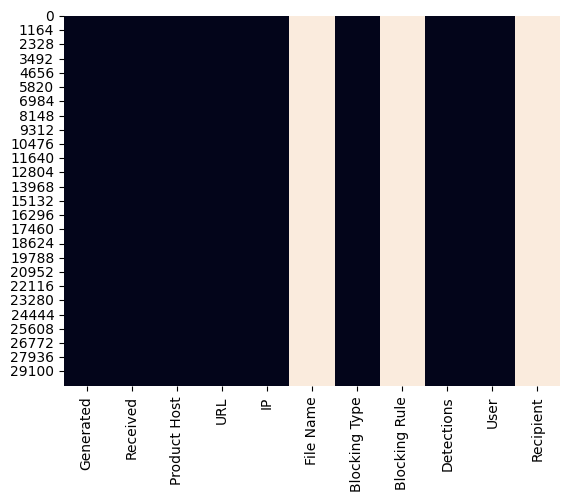

In [92]:
# Dataset Activos MST
sns.heatmap(Web_security.isnull(), cbar=False)
plt.show()